The purpose of this notebook is to plot test vector leakage assessment results.

Below are descriptions of the input parameters:
- input path: The path to the directory containing the tvla results to plot. The plots are also saved in this directory.
- target_byte: The specific target byte being plotted. This value corresponds to the specific .csv file that will be plotted.
- byte_value: The specific byte value being plotted. This and the above parameter values correspond to the specific .csv file that will be plotted.

In [1]:
import os, sys
import pandas as pd
from math import floor, ceil

sys.path.append('../utilities/')
from graphGenerationUtilities import *

%load_ext autotime

In [2]:
data_params = {
    "input_path":"../results/unmasked-aes-stm32f/test-vector-leakage-assessment/PC2_CB2_TDS3_K6_U_20k/", # Path to load the data
    "target_byte": 10, # Target byte to identify which file to plot
    "byte_value": 78 # Byte Value to identify which file to plot
}

In [3]:
# Read the csv file containing the tvla results
f_name = "target-byte-" + str(data_params["target_byte"]) + "-byte-value-" + str(data_params["byte_value"])
tvla_path = os.path.join(data_params['input_path'], f_name + ".csv")
try:
    tvla_results = pd.read_csv(tvla_path)
except OSError:
    print("could not access {}".format(f_name))
    sys.exit()
    
tvla_results.head()

,time,t-value
0,1,2.229196
1,2,-0.755462
2,3,1.018794
3,4,0.289263
4,5,0.302979


In [4]:
# min and max t values are found for y-ticks of plot.
min_t_val = floor(tvla_results["t-value"].min())
max_t_val = ceil(tvla_results["t-value"].max())

# The range of the above values is calculated.
# This is floored with an arbitrarily-selected value. This value affects the number of y-ticks shown.
# This will represent the amount incremented between y-ticks.
t_val_increment = ((max_t_val - min_t_val)//5)

# The increment value is ensured to be at least 1.
if not(t_val_increment):
    t_val_increment = 1
    
# The y_ticks are created. 
y_ticks = list(range(min_t_val, max_t_val+1, t_val_increment))

# If the max t value was not included in the range (the data extends above the largest y-tick)
# Then a new value is added to the y-ticks; the current max y-tick plus the increment value.
if not(max_t_val in y_ticks):
    y_ticks.append(y_ticks[-1]+t_val_increment)

In [5]:
# The x ticks are calculated. There is some variability with these values between masked and unmasked (due to num_time_samples)
# so, code was introduced to account for the differences.
num_time_samples = tvla_results.shape[0]
time_samples_inc = num_time_samples//5
x_ticks = list(range(0, num_time_samples+1, time_samples_inc))

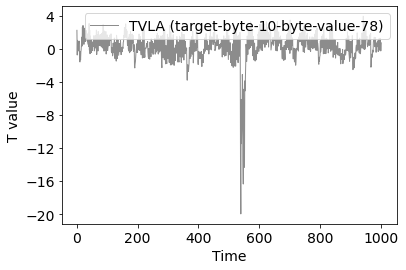

In [6]:
fig, ax = plt.subplots()
ax.plot(tvla_results['time'], tvla_results['t-value'], color='grey', 
        linestyle='-', linewidth=1, alpha=0.9, label="TVLA ({})".format(f_name))

legend_without_duplicate_labels(ax, loc="upper right")
plt.xlabel('Time')
plt.ylabel('T value')
plt.xticks(x_ticks)
plt.yticks(y_ticks)

tvla_plot_path = os.path.join(data_params['input_path'], f_name + "-plot.png")
plt.savefig(tvla_plot_path, dpi=150, bbox_inches='tight')
plt.show()